#  <font color='blue'>Data Science Academy </font>

# <font color='blue'>Big Data Real-time Analytics com Python e Spark </font>

## Capitulo 3

Análise exploratória de dados

Analisar dados de bykes tixis em nova york

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importando arquivo csv
df = pd.read_csv('../3-Arquivos-Cap02/8-Arquivos-Cap03/data/taxis_bikes_nycity.csv')

In [4]:
df.head(10)

,Data,Distancia,Tempo
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN
5,8/8/15,3.40,NaN
6,8/9/15,2.50,NaN
7,8/10/15,3.36,0:28:37
8,8/11/15,1.67,0:13:07
9,8/12/15,1.42,0:10:35


In [5]:
df.columns

Index(['Data', 'Distancia', 'Tempo'], dtype='object')

In [6]:
df.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

In [7]:
df.index

RangeIndex(start=0, stop=81, step=1)

In [8]:
df['Data'].head()

0    8/2/15
1    8/3/15
2    8/4/15
3    8/6/15
4    8/7/15
Name: Data, dtype: object

In [11]:
# carregando novamenrte os dados, mas indicando que data é do tipo date
df = pd.read_csv('../3-Arquivos-Cap02/8-Arquivos-Cap03/data/taxis_bikes_nycity.csv', parse_dates=['Data'])

In [12]:
df.dtypes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [13]:
df.head(10)

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN
5,2015-08-08,3.40,NaN
6,2015-08-09,2.50,NaN
7,2015-08-10,3.36,0:28:37
8,2015-08-11,1.67,0:13:07
9,2015-08-12,1.42,0:10:35


In [18]:
# colocando a data com index
df.set_index('Data', inplace = True)

In [19]:
df.head(10)

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07


<AxesSubplot:xlabel='Data'>

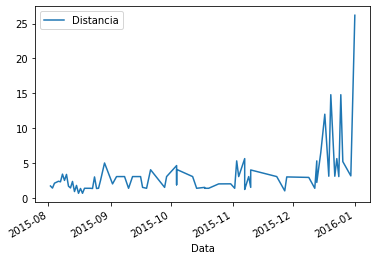

In [22]:
df.plot()

<AxesSubplot:xlabel='Data'>

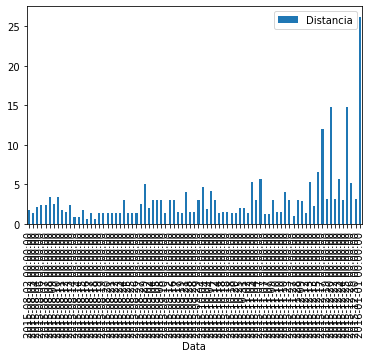

In [23]:
df.plot(kind='bar')

Text(0, 0.5, 'Count')

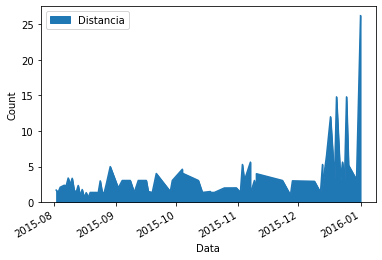

In [25]:
df.plot(kind='area')
plt.ylabel('Count')

In [26]:
df.describe()

,Distancia
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


In [29]:
len(df.loc['2015-11'])

13

In [30]:
df.loc['2015-11']

,Distancia,Tempo
Data,,
2015-11-02,1.37,0:08:43
2015-11-03,5.30,0:39:26
2015-11-04,3.05,0:22:12
2015-11-07,5.63,0:49:05
2015-11-07,1.26,NaN
2015-11-07,1.20,NaN
2015-11-09,3.05,0:22:36
2015-11-10,1.50,0:09:00
2015-11-10,1.50,0:11:33


In [37]:
colunas = ['Distancia','Tempo']
df.columns = colunas
df.head(10)

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07


<AxesSubplot:xlabel='Data'>

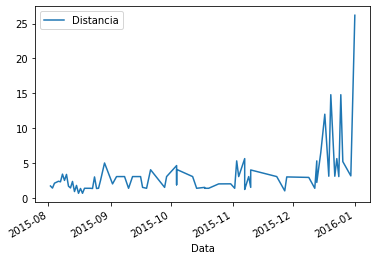

In [38]:
df.plot()

In [41]:
# função para converter a coluna duração no tempo em segundos
def calcula_total_segundos(time):
    if time is np.nan:
        return np.nan
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds)+60*int(mins)+60*60*int(hrs)
    return seconds

In [42]:
df['Segundos'] = df.Tempo.map(calcula_total_segundos)
df

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
...,...,...,...
2015-12-24,3.05,0:25:08,1508.0
2015-12-25,14.80,2:20:00,8400.0
2015-12-26,5.20,NaN,NaN


In [43]:
df.describe()

,Distancia,Segundos
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


In [45]:
df.fillna(0).describe()

,Distancia,Segundos
count,81.000000,81.000000
mean,3.137531,1220.901235
std,3.634519,2240.756985
min,0.650000,0.000000
25%,1.370000,0.000000
50%,2.100000,573.000000
75%,3.050000,1426.000000
max,26.200000,15643.000000


In [47]:
# convertendo segundos em minutos
df['Minutos'] = df.Segundos.map(lambda x: x / 60)

In [48]:
df

,Distancia,Tempo,Segundos,Minutos
Data,,,,
2015-08-02,1.70,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN
...,...,...,...,...
2015-12-24,3.05,0:25:08,1508.0,25.133333
2015-12-25,14.80,2:20:00,8400.0,140.000000
2015-12-26,5.20,NaN,NaN,NaN


In [50]:
df.fillna(0).describe()

,Distancia,Segundos,Minutos
count,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354
std,3.634519,2240.756985,37.345950
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,573.000000,9.550000
75%,3.050000,1426.000000,23.766667
max,26.200000,15643.000000,260.716667


<AxesSubplot:xlabel='Distancia', ylabel='Minutos'>

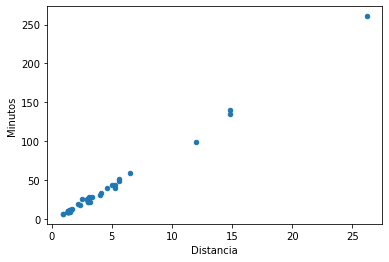

In [51]:
df.plot(x='Distancia', y='Minutos', kind='scatter')

In [52]:
df.corr()

,Distancia,Segundos,Minutos
Distancia,1.000000,0.997203,0.997203
Segundos,0.997203,1.000000,1.000000
Minutos,0.997203,1.000000,1.000000


In [53]:
df.corr(method='spearman')

,Distancia,Segundos,Minutos
Distancia,1.00000,0.96482,0.96482
Segundos,0.96482,1.00000,1.00000
Minutos,0.96482,1.00000,1.00000


In [54]:
df.corr(method='kendall')

,Distancia,Segundos,Minutos
Distancia,1.00000,0.88305,0.88305
Segundos,0.88305,1.00000,1.00000
Minutos,0.88305,1.00000,1.00000


<AxesSubplot:>

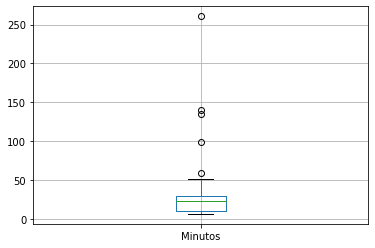

In [55]:
df.boxplot('Minutos',return_type='axes')

In [56]:
df['Minutos_por_km'] = df['Minutos'] / df['Distancia']

In [57]:
df.fillna(0).describe()

,Distancia,Segundos,Minutos,Minutos_por_km
count,81.000000,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354,4.959450
std,3.634519,2240.756985,37.345950,3.803856
min,0.650000,0.000000,0.000000,0.000000
25%,1.370000,0.000000,0.000000,0.000000
50%,2.100000,573.000000,9.550000,6.962963
75%,3.050000,1426.000000,23.766667,7.792350
max,26.200000,15643.000000,260.716667,10.000000


array([[<AxesSubplot:title={'center':'Minutos_por_km'}>]], dtype=object)

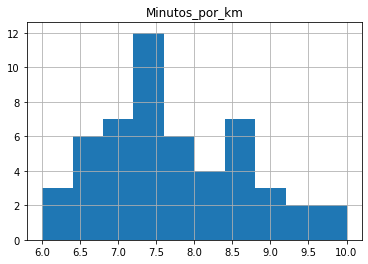

In [59]:
df.hist('Minutos_por_km')

array([[<AxesSubplot:title={'center':'Minutos_por_km'}>]], dtype=object)

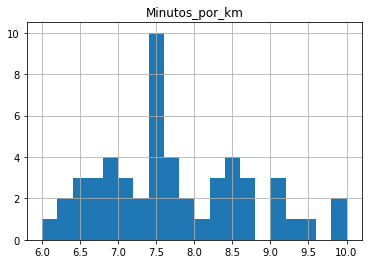

In [63]:
df.hist('Minutos_por_km', bins=20)

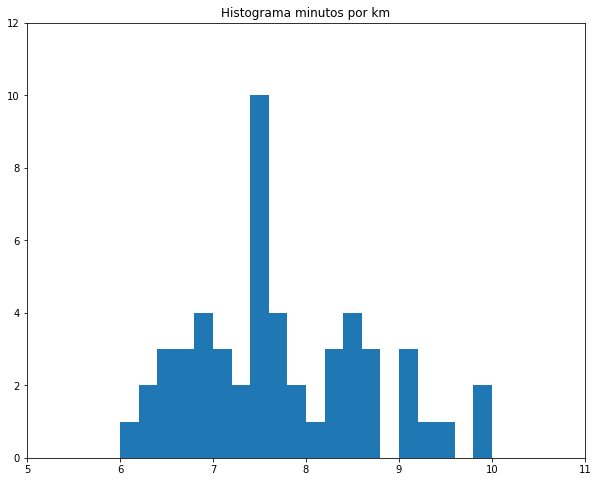

In [65]:
df.hist('Minutos_por_km', bins=20, figsize=(10,8))
plt.xlim(5,11)
plt.ylim(0,12)
plt.title('Histograma minutos por km')
plt.grid(False)

<AxesSubplot:xlabel='Data'>

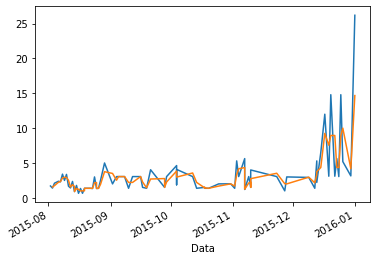

In [66]:
# calculando a média de distancia em uma janela de tempo de 2 horas
df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window=2).mean().plot()

<AxesSubplot:xlabel='Data'>

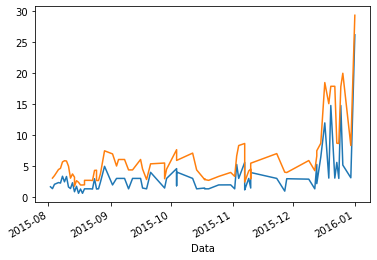

In [67]:
# calculando a soma de distancia em uma janela de tempo de 2 horas
df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window=2).sum().plot()

<AxesSubplot:xlabel='Data'>

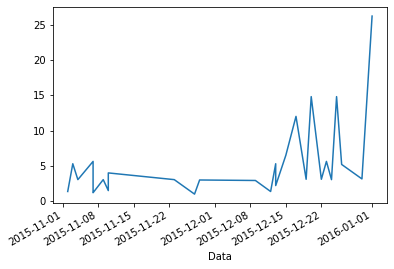

In [68]:
df['2015-11':'2016-11']['Distancia'].plot()

In [73]:
df.loc['2015-8-12']

Distancia              1.42
Tempo               0:10:35
Segundos              635.0
Minutos           10.583333
Minutos_por_km     7.453052
Name: 2015-08-12 00:00:00, dtype: object